# **Teleportación Cuántica**

Este tutorial nos guiara a través de una popular técnica de información cuántica conocida como **teletransportación cuántica**. Aunque la *teletransportación* se ha considerado un mito de ciencia ficción, ¡vamos a demostrar que ya es posible! La técnica aprovecha muchos principios fundamentales de la computación cuántica y tiene numerosas aplicaciones útiles en todo el campo. Estos principios incluyen (entre otros): el teorema de no clonación, el entrelazamiento cuántico y el principio de medición diferida. ¡Vamos a profundizar!

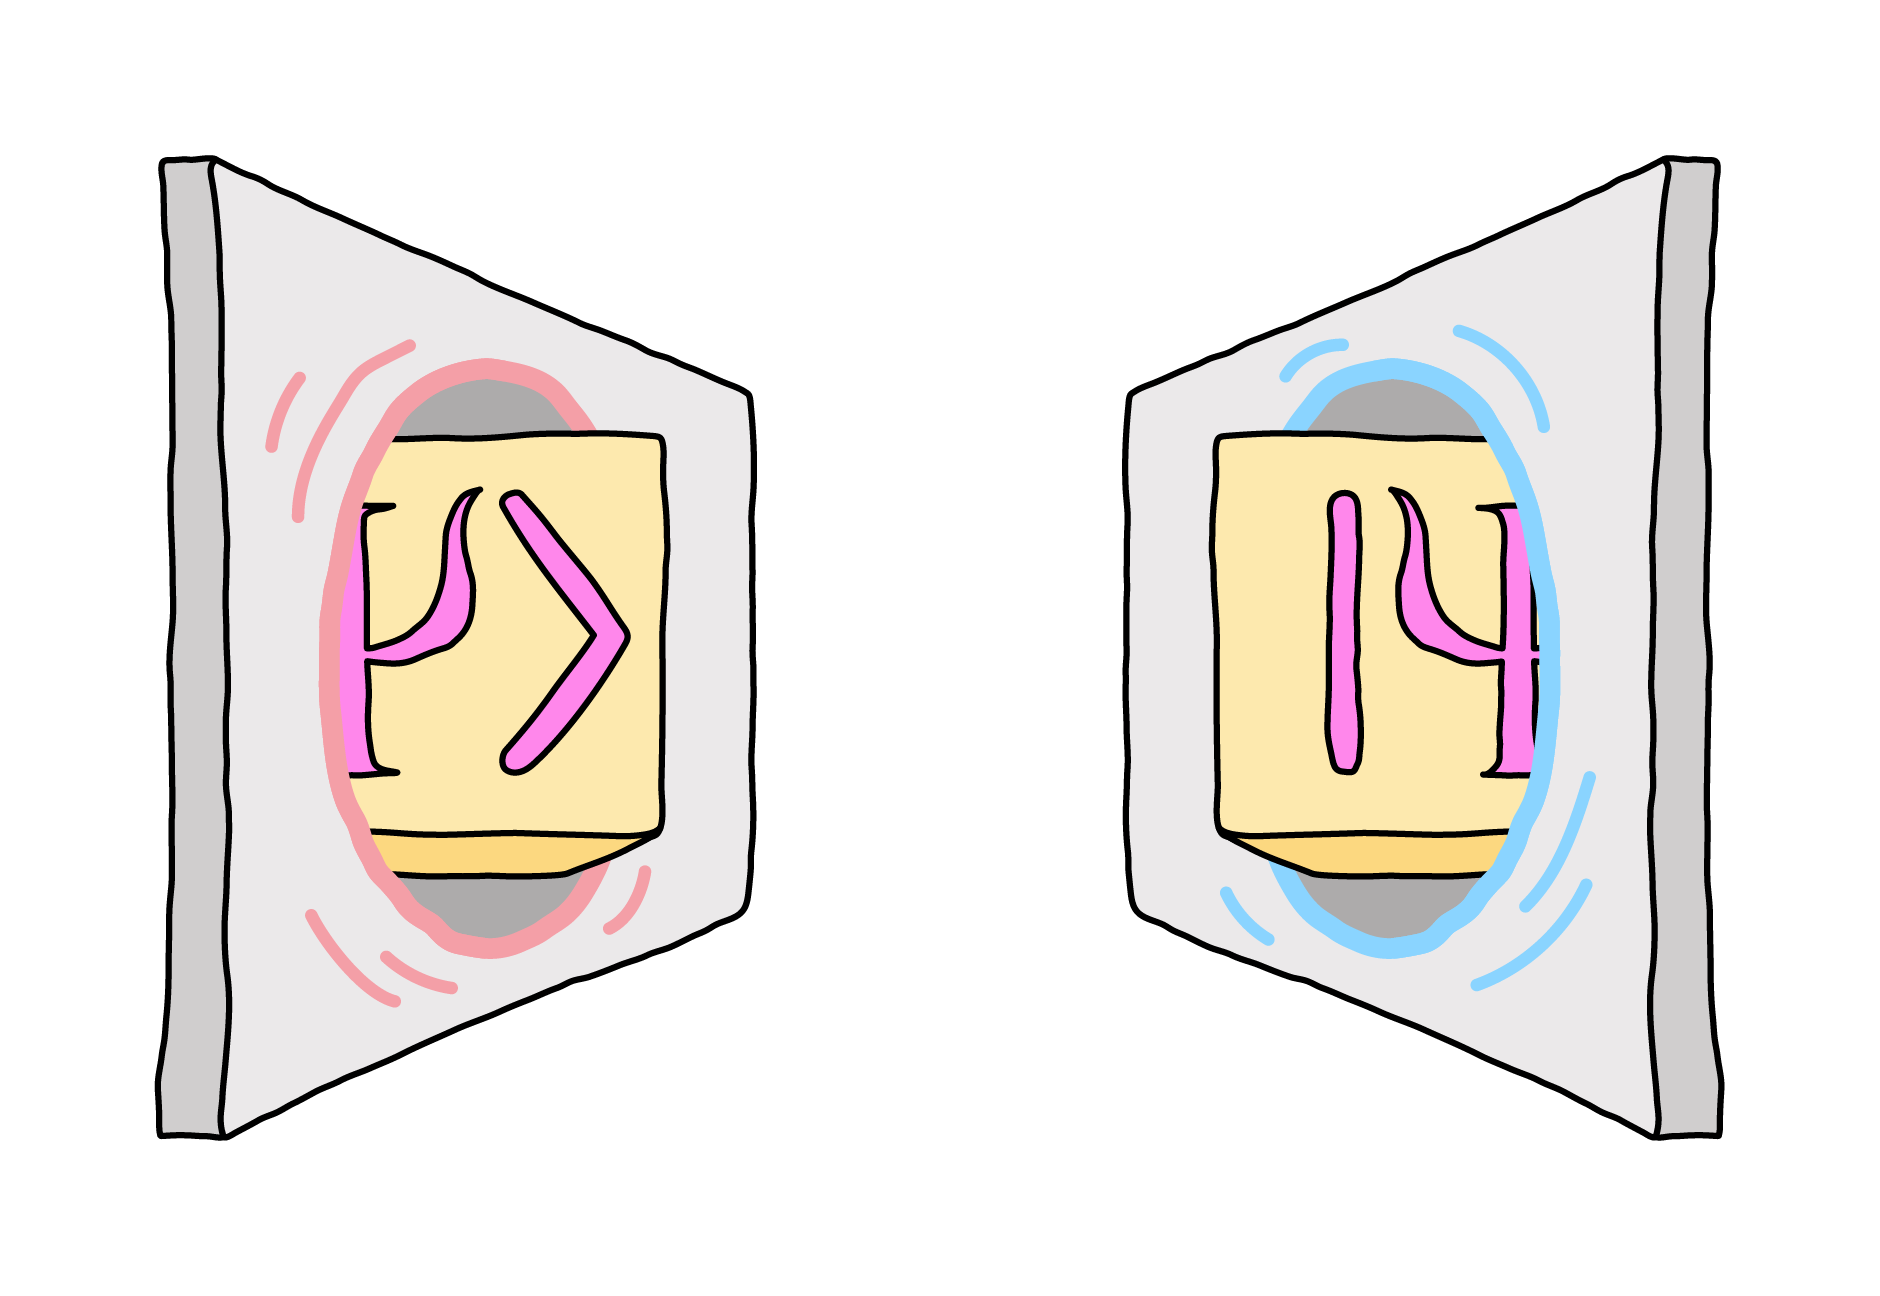

In [ ]:
!pip install pennylane --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 91.8 MB/s eta 0:00:00


In [ ]:
import pennylane as qml
import numpy as np

# **Objetivo:** Transferencia de Información Cuántica

Supongamos que dos investigadores, Alice y Bob, desean enviar su estado cuántico a Bob. El protocolo de teletransportación cuántica permite a Alice realizar esta tarea de forma muy elegante, y se describe en cuatro pasos:

1. **Preparación del estado:** Alice inicializa su qubit al estado que desea teletransportar.

2. **Entrelazamiento compartido:** Se crea un estado de Bell y se distribuye a Alice y Bob (un qubit cada uno).

3. **Cambio de base:** Alice convierte sus dos qubits de la base de Bell a la base computacional.

4. **Medición:** Alice mide sus dos qubits y luego le indica a Bob cómo convertir su qubit para obtener el estado deseado. Cabe destacar que solo se teletransporta información cuántica, no una partícula física.

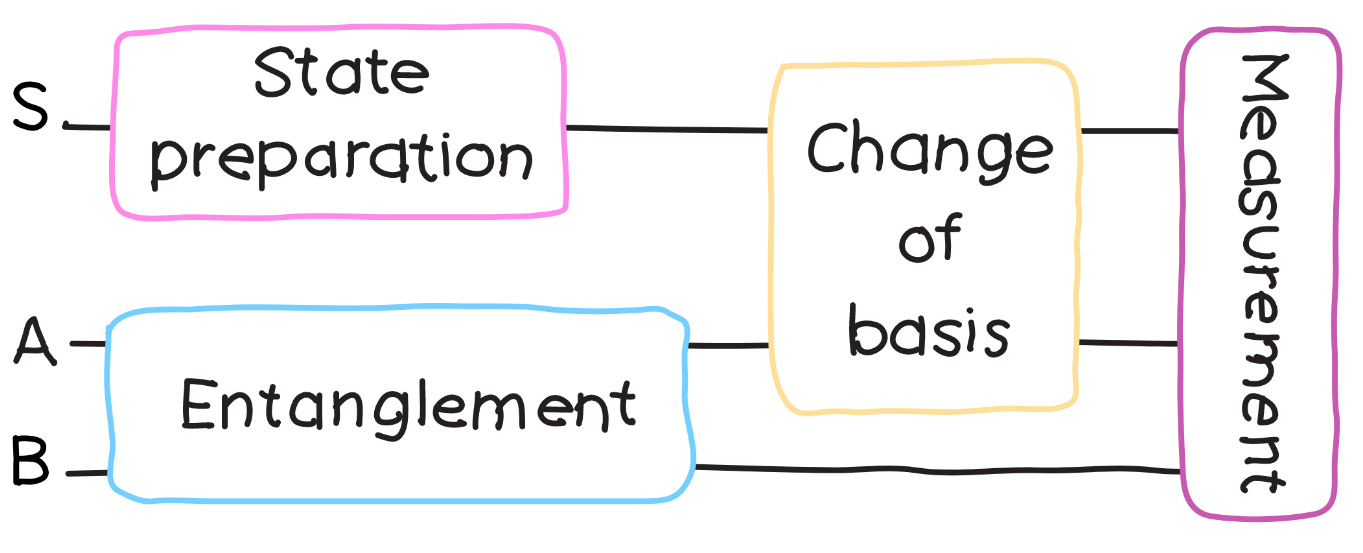

## Problema: El Teorema de No Clonación

Quizás te preguntes por qué necesitamos teletransportar un estado. ¿Acaso Alice no puede simplemente hacer una copia y enviársela a Bob? Resulta que copiar estados arbitrarios está *prohibido*, lo cual puedes entender usando el **teorema de no clonación**. La demostración es sorprendentemente sencilla. Supongamos que queremos diseñar un circuito (transformación unitaria) $U$ que pueda realizar la siguiente acción:

$$\begin{aligned}
\begin{align*}
U(\vert \psi\rangle \otimes \vert s\rangle ) &= \vert \psi\rangle \otimes \vert \psi\rangle, \\
U(\vert \varphi\rangle \otimes \vert s\rangle ) &= \vert \varphi \rangle \otimes \vert \varphi \rangle,
\end{align*}
\end{aligned}$$

donde $\vert \psi\rangle$ y $\vert \varphi\rangle$ son estados arbitrarios normalizados de un solo cúbit, y $\vert s \rangle$ es un estado inicial arbitrario normalizado. ¡Ahora demostraremos que tal $U$ no existe!

Primero, calculemos el producto interno de los lados izquierdos de las dos ecuaciones:

$$(\langle \psi \vert \otimes \langle s \vert) U^\dagger U(\vert \varphi\rangle \otimes \vert s\rangle ) = \langle \psi \vert \varphi\rangle \ \langle s \vert s\rangle$$

Como $\langle s \vert s\rangle$ es igual a 1, esto se evalúa como $\langle \psi \vert \varphi \rangle$. A continuación, comparamos el producto interno de los lados derechos de las dos ecuaciones:
$(\langle \psi \vert \varphi \rangle)^2$. Estos productos internos deben ser iguales, y solo lo son si son un valor que se eleva al cuadrado. Los únicos valores válidos para el producto interno son 1 y 0.
Pero si el producto interno es 1, los estados son iguales; por otro lado, si el producto interno es 0, los estados son ortogonales. Por lo tanto, ¡no podemos clonar estados arbitrarios!

## Solución: Teletransportación Cuántica

Ahora veremos cómo compartir información cuántica sin clonarla, paso a paso.

# 1. Preparación del estado

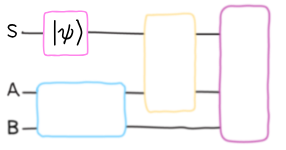

La teletransportación implica tres qubits. Dos de ellos están en manos de Alice y el tercero en manos de Bob. Denotaremos sus estados mediante subíndices:

1. $\vert\cdot\rangle_S,$ El primer qubit de Alice que preparará en un estado arbitrario.
2. $\vert\cdot\rangle_A,$ El cúbit auxiliar (o "ancilla") de Alice que entrelazará con el qubit de Bob para comunicarse.
3. $\vert \cdot\rangle_B,$ El cúbit de Bob que recibirá el estado teletransportado.

En conjunto, su estado inicial es:

$$\vert 0\rangle_S \vert 0\rangle_A \vert 0\rangle_B.$$

Lo primero que hace Alice es preparar su primer qubit en el estado $\vert
\psi\rangle$ que quiera enviar a Bob para que su estado combinado sea:

$$\vert \psi\rangle_S \vert 0\rangle_A \vert 0\rangle_B.$$

Podemos usar la siguiente [función cuántica](https://docs.pennylane.ai/en/stable/introduction/circuits.html#quantum-functions)
para realizar el paso de preparación del estado:

In [ ]:
def state_preparation(state):
    qml.StatePrep(state, wires=["S"])

# 2. Entrelazamiento compartido

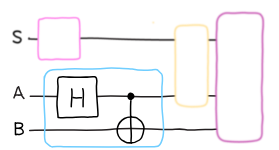

La teletransportación funciona porque utiliza un *estado entrelazado* como recurso compartido entre Alice y Bob. Imaginen un proceso que genere un par de qubits entrelazados y envíe un qubit a cada parte. Para simplificar (¡y simular!), representaremos el proceso de entrelazamiento como parte de nuestro circuito.

El entrelazamiento de los qubits $A$ y $B$ da como resultado el estado combinado:

$$\frac{1}{\sqrt{2}}\left( \vert \psi\rangle_S \vert 0\rangle_A \vert 0\rangle_B + \vert \psi\rangle_S \vert 1\rangle_A \vert 1\rangle_B \right)\tag{1}$$

El subsistema $AB$ se encuentra ahora en lo que se conoce como *estado de Bell*. Hay
cuatro estados Bell de dos qubits máximamente entrelazados, y forman el Bell
base:

\begin{align*}
\vert \psi_+\rangle &= \frac{1}{\sqrt{2}} \left( \vert 00\rangle + \vert 11\rangle \right), \\
\vert \psi_-\rangle &= \frac{1}{\sqrt{2}} \left( \vert 00\rangle - \vert 11\rangle \right), \\
\vert \phi_+\rangle &= \frac{1}{\sqrt{2}} \left( \vert 01\rangle + \vert 10\rangle \right), \\
\vert \phi_-\rangle &= \frac{1}{\sqrt{2}} \left( \vert 01\rangle - \vert 10\rangle \right).
\end{align*}

En nuestro experimento, dado que $AB$ comenzó en el estado $\vert 00\rangle$, creamos el estado de Bell $\vert \psi_+\rangle$, como se muestra en la ecuación (1).

In [ ]:
def entangle_qubits():
    qml.Hadamard(wires="A")
    qml.CNOT(wires=["A", "B"])

A partir de ahora, los subíndices de qubit se eliminarán de los estados por razones de brevedad.

# 3. Cambio de base

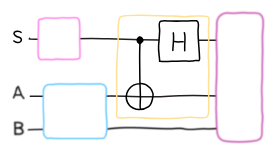

Aquí es donde las cosas se complican, pero también son muy interesantes. El tercer paso del protocolo consiste en aplicar un $CNOT$ y una **Hadamard** a los dos primeros qubits. Esto se realiza antes de las mediciones y se denomina "cambio de base". Pero ¿qué base es esta? Observe cómo estas dos puertas son lo *opuesto* a lo que hacemos para crear un estado de Bell. Si las ejecutamos en la dirección opuesta, transformamos la base de nuevo a la computacional y simulamos una medición en la base de Bell.

Tras la transformación de base, si observamos que los dos primeros qubits se encuentran en el estado $\vert 00\rangle$, esto correspondería al resultado $\vert \psi_+\rangle$ en la base de Bell, $\vert 01\rangle$ correspondería a $\vert \phi_-\rangle$, etc. Realicemos este cambio de base paso a paso.

Supongamos que escribimos nuestro estado inicial $\vert \psi\rangle$ como $\alpha\vert 0\rangle + \beta\vert 1\rangle$, donde $\alpha$ y $\beta$ son coeficientes complejos. Desarrollando los términos de (1), obtenemos:

$$\frac{1}{\sqrt{2}} ( \alpha\vert 000\rangle +
\beta\vert 100\rangle + \alpha \vert 011\rangle +
\beta\vert 111\rangle )$$

Ahora apliquemos una $CNOT$ entre los dos qubits de Alice:

$$\frac{1}{\sqrt{2}} ( \alpha\vert 000\rangle +
\beta\vert 110\rangle + \alpha \vert 011\rangle +
\beta\vert 101\rangle )$$

Y luego un **Hadamard** en su primer qubit:

$$\frac{1}{2} ( \alpha \vert 000\rangle + \alpha\vert 100\rangle + \beta\vert 010\rangle - \beta\vert 110\rangle + \alpha \vert 011\rangle + \alpha \vert 111 \rangle + \beta\vert 001\rangle - \beta\vert 101 \rangle ).$$

Ahora necesitamos hacer algunos reordenamientos. Agrupamos los términos según la
primeros dos qubits:

$$\frac{1}{2} \vert 00\rangle(\alpha\vert 0\rangle + \beta\vert 1\rangle) + \frac{1}{2}\vert 01\rangle (\beta\vert 0\rangle + \alpha\vert 1\rangle) + \frac{1}{2}\vert 10\rangle (\alpha\vert 0\rangle - \beta\vert 1\rangle) + \frac{1}{2}\vert 11\rangle (-\beta\vert 0\rangle + \alpha\vert 1\rangle).\tag{2}$$

In [ ]:
def basis_rotation():
    qml.CNOT(wires=["S", "A"])
    qml.Hadamard(wires="S")

# 4. Medición

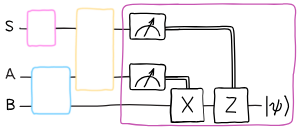

El último paso del protocolo implica que Alice realice una medición en sus qubits y le indique a Bob que realice algunas operaciones según lo que haya medido. Pero, ¿por qué exactamente necesitamos hacer esto? En el paso anterior, ya realizamos una rotación de base de vuelta a la base computacional, así que ¿no deberíamos estar listos? ¡No del todo, pero casi!

Repasemos la ecuación (2). Si Alice mide sus dos qubits en la base computacional, tiene la misma probabilidad de obtener cualquiera de los cuatro resultados posibles. Si observa los dos primeros qubits en el estado $\vert 00 \rangle$, sabría inmediatamente que el qubit de Bob estaba en el estado $\alpha \vert 0 \rangle + \beta \vert 1 \rangle$, ¡que es precisamente el estado que intentamos teletransportar!

Si, en cambio, observara los qubits en el estado $\vert 01\rangle$, aún sabría el estado de Bob, pero se desvía ligeramente del estado original. En particular, tenemos:

$$\beta \vert 0 \rangle + \alpha \vert 1 \rangle = X \vert \psi \rangle.$$

Tras obtener estos resultados, Alice podría indicarle a Bob que simplemente aplicara una puerta $X$ a su qubit para recuperar el estado original. De igual manera, si obtuviera $\vert 10\rangle$, le indicaría que aplicara una puerta $Z$.

En la versión [\"tradicional\" de la teletransportación cuántica](https://quantum.country/teleportation), esto es, de hecho, exactamente lo que sucede. Alice llamaría a Bob por teléfono, le informaría el estado que observó y él podría aplicar la corrección adecuada. En esta situación, las mediciones se realizan a mitad del protocolo y los resultados se utilizarían para controlar la aplicación de futuras puertas cuánticas. Esto se conoce como medición de circuito intermedio, y estas mediciones se expresan en PennyLane mediante `qml.measure <pennylane.measure>`{.interpreted-text
role="func"}. Los resultados de las mediciones de circuito intermedio pueden utilizarse para controlar las operaciones, lo que se expresa en PennyLane mediante `qml.cond <pennylane.cond>`{.interpreted-text role="func"}.

In [ ]:
def measure_and_update():
    m0 = qml.measure("S")
    m1 = qml.measure("A")
    qml.cond(m1, qml.PauliX)("B")
    qml.cond(m0, qml.PauliZ)("B")

Ya hemos definido todos los componentes básicos del protocolo de teletransportación cuántica. ¡Vamos a unirlos!

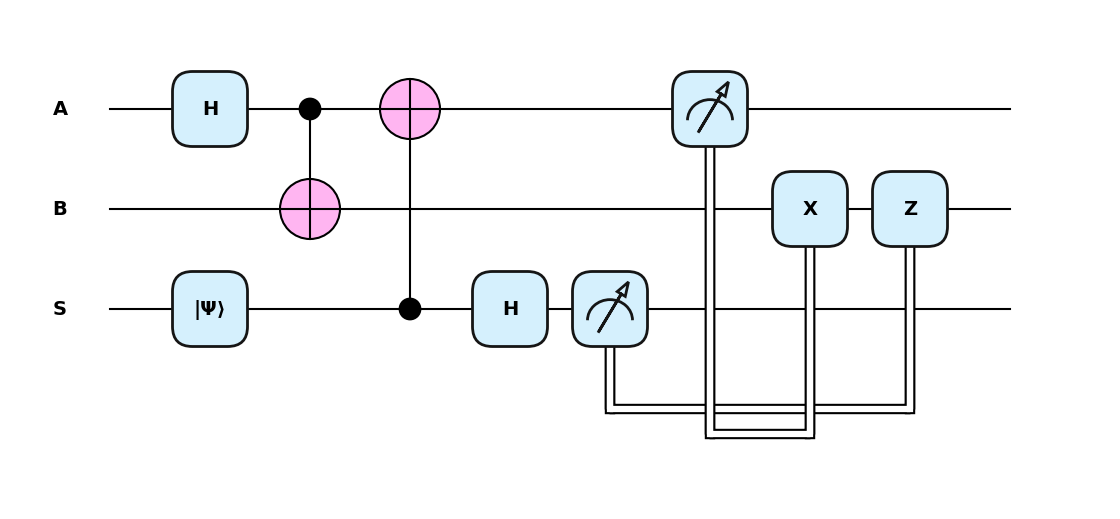

In [ ]:
def teleport(state):
    state_preparation(state)
    entangle_qubits()
    basis_rotation()
    measure_and_update()


state = np.array([1 / np.sqrt(2) + 0.3j, 0.4 - 0.5j])
_ = qml.draw_mpl(teleport, style="pennylane")(state)

Existe un concepto ingenioso conocido como el [principio de medición diferida](https://en.wikipedia.org/wiki/Deferred_Measurement_Principle), que básicamente establece que podemos enviar todas nuestras mediciones al *final* de nuestro circuito. Esto puede ser útil por diversas razones, como cuando se trabaja en un sistema que no admite mediciones a mitad del circuito. En PennyLane, al vincular un circuito a un dispositivo que no las admite, se aplicará automáticamente el principio de medición diferida y se actualizará el circuito para que utilice operaciones controladas. Tenga en cuenta que debe especificar `level="device"` al llamar a `draw_mpl` para que ejecute el preprocesamiento del dispositivo antes de dibujar el circuito.

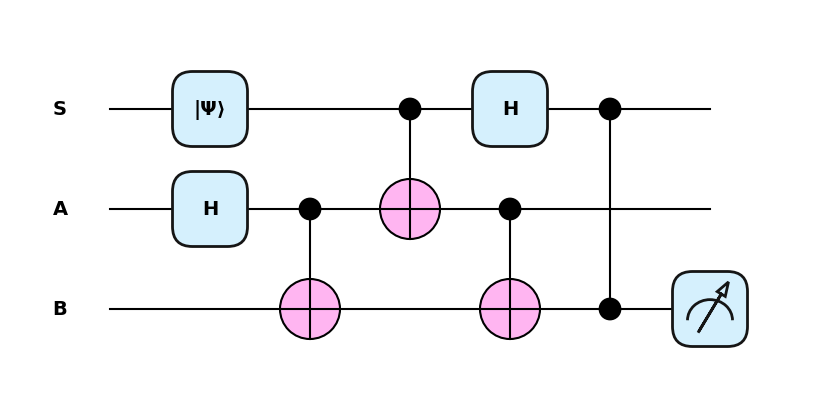

In [ ]:
dev = qml.device("default.qubit", wires=["S", "A", "B"])


@qml.qnode(dev)
def teleport(state):
    state_preparation(state)
    entangle_qubits()
    basis_rotation()
    measure_and_update()
    return qml.density_matrix(wires=["B"])


_ = qml.draw_mpl(teleport, style="pennylane", level="device")(state)

¡Puf! Nuestras señales clásicas se han convertido en puertas $CNOT$ y $CZ$.
Esto es exactamente lo que nos proporciona el principio de medición diferida: podemos aplicar una $CNOT$ en lugar de que Alice llame a Bob y le diga que aplique una puerta $X$, y lo mismo ocurre con la puerta $CZ$. Esto es increíblemente útil, ya que nos permite realizar la corrección *antes* de realizar cualquier medición. Evaluemos la acción de la $CNOT$ y la $CZ$ en el cúbit de Bob y asegurémonos de que el estado de Alice se haya teletransportado correctamente. Aplicando el $CNOT$ se obtiene:

$$\frac{1}{2} \vert 00\rangle(\alpha\vert 0\rangle + \beta\vert 1\rangle) + \frac{1}{2}\vert 01\rangle (\alpha\vert 0\rangle + \beta\vert 1\rangle) + \frac{1}{2}\vert 10\rangle (\alpha\vert 0\rangle - \beta\vert 1\rangle) + \frac{1}{2}\vert 11\rangle (\alpha\vert 0\rangle - \beta\vert 1\rangle)$$

Luego, aplicando la $CZ$ se obtiene:

$$\frac{1}{2} \vert 00\rangle(\alpha\vert 0\rangle + \beta\vert 1\rangle) + \frac{1}{2}\vert 01\rangle (\alpha\vert 0\rangle + \beta\vert 1\rangle) + \frac{1}{2}\vert 10\rangle (\alpha\vert 0\rangle + \beta\vert 1\rangle) + \frac{1}{2}\vert 11\rangle (\alpha\vert 0\rangle + \beta\vert 1\rangle)\tag{3}$$

Cuando Alice mida sus dos qubits al final, independientemente del resultado que obtenga, el qubit de Bob estará en el estado $\alpha\vert 0\rangle + \beta \vert
1\rangle$. Esto significa que nuestro protocolo ha cambiado el estado del cúbit de Bob al que Alice deseaba enviarle, ¡lo cual es realmente increíble!

Podemos usar `qml.density_matrix <pennylane.density_matrix>`{.interpreted-text
role="func"} para rastrear y devolver el subsistema de Bob como una matriz de densidad, que es una descripción más general del estado de su cúbit.
Usaremos esto para verificar que el estado de Alice se teletransportó correctamente al cúbit de Bob. Reordenando la ecuación (3), podemos ver que el estado final del sistema es:

$$\frac{1}{2} (\vert 00\rangle + \vert 01\rangle + \vert 10\rangle + \vert 11\rangle) \vert \psi\rangle\tag{4}$$

Ahora, podemos confirmar que nuestra implementación del protocolo de teletransportación cuántica funciona según lo esperado comparando la matriz de densidad final de Bob con la matriz de densidad original de Alice:

In [ ]:
def teleport_state(state):
    teleported_density_matrix = teleport(state)
    original_density_matrix = qml.math.dm_from_state_vector(state)

    if not np.allclose(teleported_density_matrix, original_density_matrix):
        raise ValueError(
            f"Alice's state ({state}) not teleported properly. "
            f"Final density matrix of Bob's subsystem: {teleported_density_matrix}"
        )
    print("State successfully teleported!")


teleport_state(state)

State successfully teleported!


# Resumen

Repasemos los conceptos aprendidos a lo largo de este tutorial.
Primero, establecimos que los estados cuánticos no se pueden copiar arbitrariamente debido al *teorema de no clonación*. Luego, aprendimos sobre el *entrelazamiento cuántico*. Una vez que Alice y Bob compartieron un par de cúbits entrelazados, Alice realizó un *cambio de base* de la base de Bell a la base computacional. Finalmente, utilizando el *principio de medición diferida* cuando fue necesario, Alice midió sus dos qubits e informó a Bob sobre cómo rotar su qubit al estado deseado.

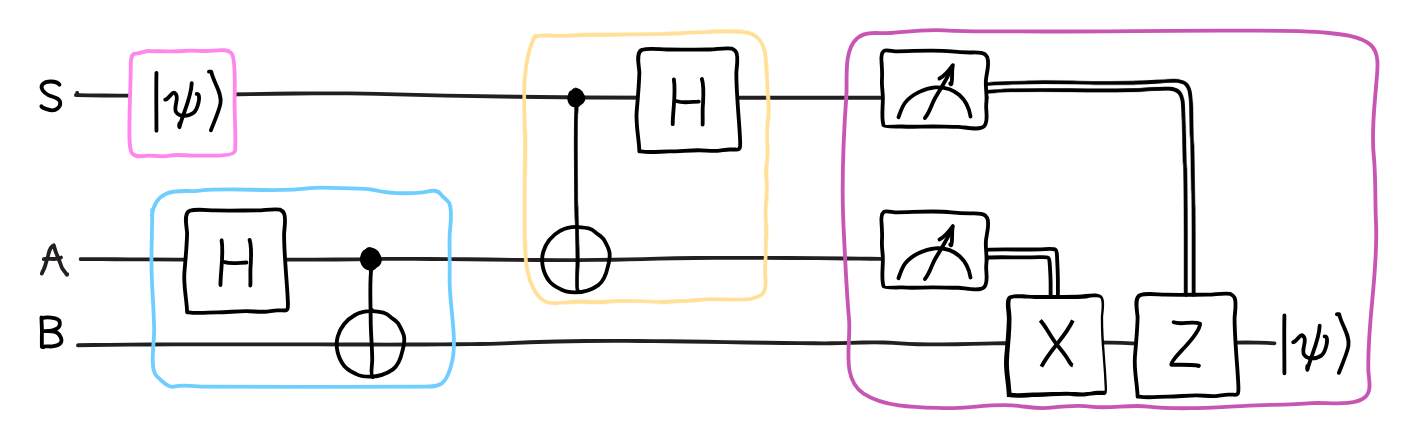


Así, Alice y Bob realizaron la teletransportación cuántica, ¡y con un circuito bastante pequeño! Algunos de ustedes quizá piensen ahora que la teletransportación es imposible, y no estarían solos si así fuera. El propio Einstein se refirió a la naturaleza no local del entrelazamiento como "acción fantasmal a distancia", pero podemos estar tranquilos: debido a la necesidad de comunicación clásica entre Alicia y Bob, los estados cuánticos (en otras palabras, la información) aún no pueden teletransportarse a una velocidad superior a la de la luz. ¡No dejen que esto les reste importancia a la teletransportación cuántica! Este protocolo es una herramienta crucial en el procesamiento de la información cuántica, y ahora es una herramienta que ustedes manejan.